In [0]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(len(XT))
print(len(Xt))

25000
25000


In [0]:
print(XT[0])
print(YT[:10])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0]


In [0]:
word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
print(word_idx.get('5'))

454


In [0]:
idx_word_dict = {value:key for (key,value) in word_idx.items()}
actual_review = ' '.join([idx_word_dict.get(idx-1,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? was not for it's self joke the the see already the their the a every so found of his movies it's third plot good episodes the in who guess wasn't of doesn't a again plot find the poor let her a again the the with fight like that oh a big good for to watching the but was not a the the turn a not well how this for it's self like bad as that the a not with starts with this for david movie the of only moments this br special br films of a the the for guess their the an a man this for like musical of his ever more so while there his the an to not this role be get when of was others for people the br a character love the as found a the is the of upon so well it's self fine have early seeing if is a the the that watch him a sex as plays could by the time have through to long the movie a music not on scene fine have guess of i'm all the movie more so be whole its his watch a music see for like the him this for everything of for the never characters by as for the but down by
218


In [0]:
# Create a 2D Tensor to be processed by the embedding layer
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [0]:
print(X_train.shape)
print(X_test.shape)

print(X_train[0])

(25000, 500)
(25000, 500)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 

In [0]:
# Create a Model in Keras

from keras.layers import Embedding, SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint # Save the best model, fight overfitting
from keras.callbacks import EarlyStopping # Save time


checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto',period=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=1)

hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint, earlystop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.6174 - accuracy: 0.6399 - val_loss: 1.0419 - val_accuracy: 0.5276
Epoch 2/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.4532 - accuracy: 0.7947 - val_loss: 0.4434 - val_accuracy: 0.8000
Epoch 3/10
 4096/20000 [=====>........................] - ETA: 37s - loss: 0.3987 - accuracy: 0.8276

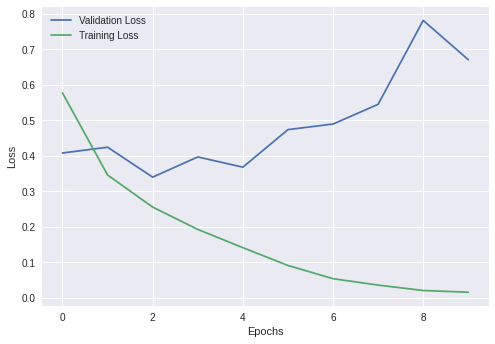

In [0]:
# Visualizing loss

h = hist.history

import matplotlib.pyplot as plt
plt.style.use('seaborn') 
plt.plot(h['val_loss'],label='Validation Loss') 
plt.plot(h['loss'],label='Training Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

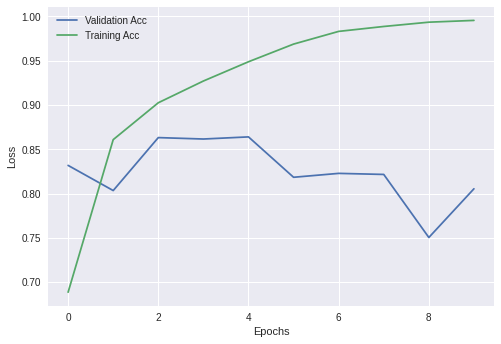

In [0]:
plt.plot(h['val_accuracy'],label='Validation Acc') 
plt.plot(h['accuracy'],label='Training Acc') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


In [0]:
#model.save('my_model.h5') #hdf5 format, saves on the disk
!ls

best_model.h5  sample_data


In [0]:
model.load_weights('best_model.h5')

In [0]:
model.evaluate(X_test,Yt)

25000/25000 [==============================] - 23s 907us/step


[0.34136415613174437, 0.855679988861084]

In [0]:
model.evaluate(X_train,YT)

25000/25000 [==============================] - 23s 902us/step


[0.2062697268772125, 0.9301999807357788]